jypyter notebook:

https://colab.research.google.com/drive/1_H0DiSx4E6B_BDKR_m7xfDMpiERLrfQx?usp=sharing

video link:

https://drive.google.com/file/d/1S96wU98IIWZrf3FXZuxt85iWQZ_6WABr/view?usp=sharing



40717 Machine Learning

Classification Hands-On

# Bayes optimal classifier and Naive Bayes

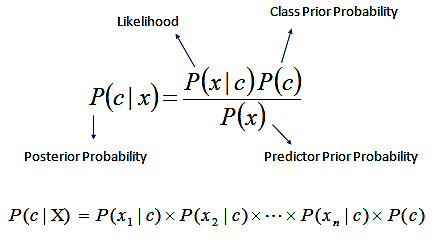

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris dataset:

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
# split dataset to train and test
from sklearn.model_selection import train_test_split #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# use Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB   
clf = GaussianNB()  # define classifier
clf.fit(X_train, y_train) # fit data

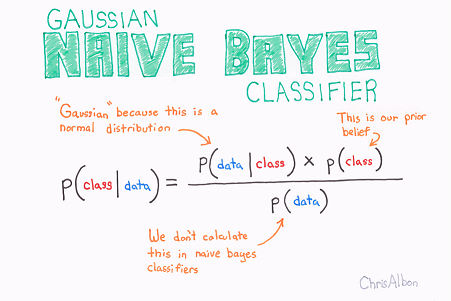

Naive Bayes:

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

In [ ]:
# prediction by trained classifier
y_pred = clf.predict(X_test)

evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print('accuracy score: %.2f%%' % (acc_score*100))

accuracy score: 90.00%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]])

Text(0.5, 1.0, 'Confusion Matrix')

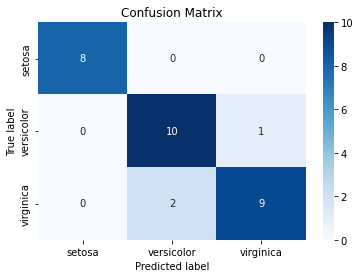

In [ ]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, xticklabels=iris.target_names , yticklabels=iris.target_names, annot=True, cmap='Blues')
ax.set_xlabel( "Predicted label")
ax.set_ylabel( "True label")
ax.set_title( "Confusion Matrix") 

other metrics that we should know about them:

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.83      0.91      0.87        11
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
acc

array([0.92, 0.94, 0.96])

In [ ]:
print("Accuracy is: %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))

Accuracy is: 94.00% +- 1.63%


Email: Arash.lagzian94@gmail.com